In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

from db_queries import get_outputs as go
from db_queries import get_ids
from get_draws.api import get_draws
from db_queries import get_population

In [2]:
ls /mnt/team/simulation_science/pub/models/vivarium_nih_us_cvd/results/draw-testing/alabama/2023_11_28/count_data

##Seed pathway stored 
#/mnt/team/simulation_science/pub/models/vivarium_nih_us_cvd/results/seed-testing/alabama/2023_10_24_14_50_26/count_data

NameError: name 'ls' is not defined

In [3]:
sim_results_dir = '/mnt/team/simulation_science/pub/models/vivarium_nih_us_cvd/results/draw-testing/alabama/2023_11_28/count_data/'

In [4]:
scenarios = ['baseline','lifestyle_100','outreach_100','polypill_100']
cols = ['input_draw', 'scenario'] #,'sex','age']
location = 'alaska'

In [5]:
#deaths = pd.read_csv(sim_results_dir + 'deaths.csv')
#deaths.cause.unique()

In [6]:
deaths = pd.read_csv(sim_results_dir + 'deaths.csv')
deaths = deaths.loc[(deaths.cause.isin(['acute_ischemic_stroke','chronic_ischemic_stroke']))].drop(columns='Unnamed: 0')
deaths = deaths.groupby(cols).sum()[['value']].reset_index()
deaths.head()

,input_draw,scenario,value
0,3,baseline,765.0
1,3,lifestyle_100,767.0
2,3,lifestyle_50,767.0
3,3,outreach_100,763.0
4,3,outreach_50,761.0


In [7]:
def calc_averted_counts_draws(baseline_scenario):
    draw_comparison = pd.DataFrame()
    for i in list(range(0,len(deaths.input_draw.unique()))):
        random_draws = deaths.input_draw.unique()[0:i+1]
        count = deaths.loc[deaths.input_draw.isin(random_draws)]
        data = count #* 100_000).reset_index()
        data_baseline = data.loc[data.scenario==baseline_scenario]
        data_averted = (data_baseline.set_index([c for c in data.columns if c != 'value' and c != 'scenario']).drop(columns='scenario')
                        - data.set_index([c for c in data.columns if c != 'value' and c != 'scenario'] + ['scenario'])).reset_index()
        data_averted['baseline_scenario'] = baseline_scenario
        data_averted['n_draws'] = i
        data_averted = data_averted.groupby(['scenario','baseline_scenario','n_draws']).value.describe(percentiles=[0.025,0.975]).reset_index()
        draw_comparison = pd.concat([draw_comparison, data_averted], ignore_index=True)
    return draw_comparison

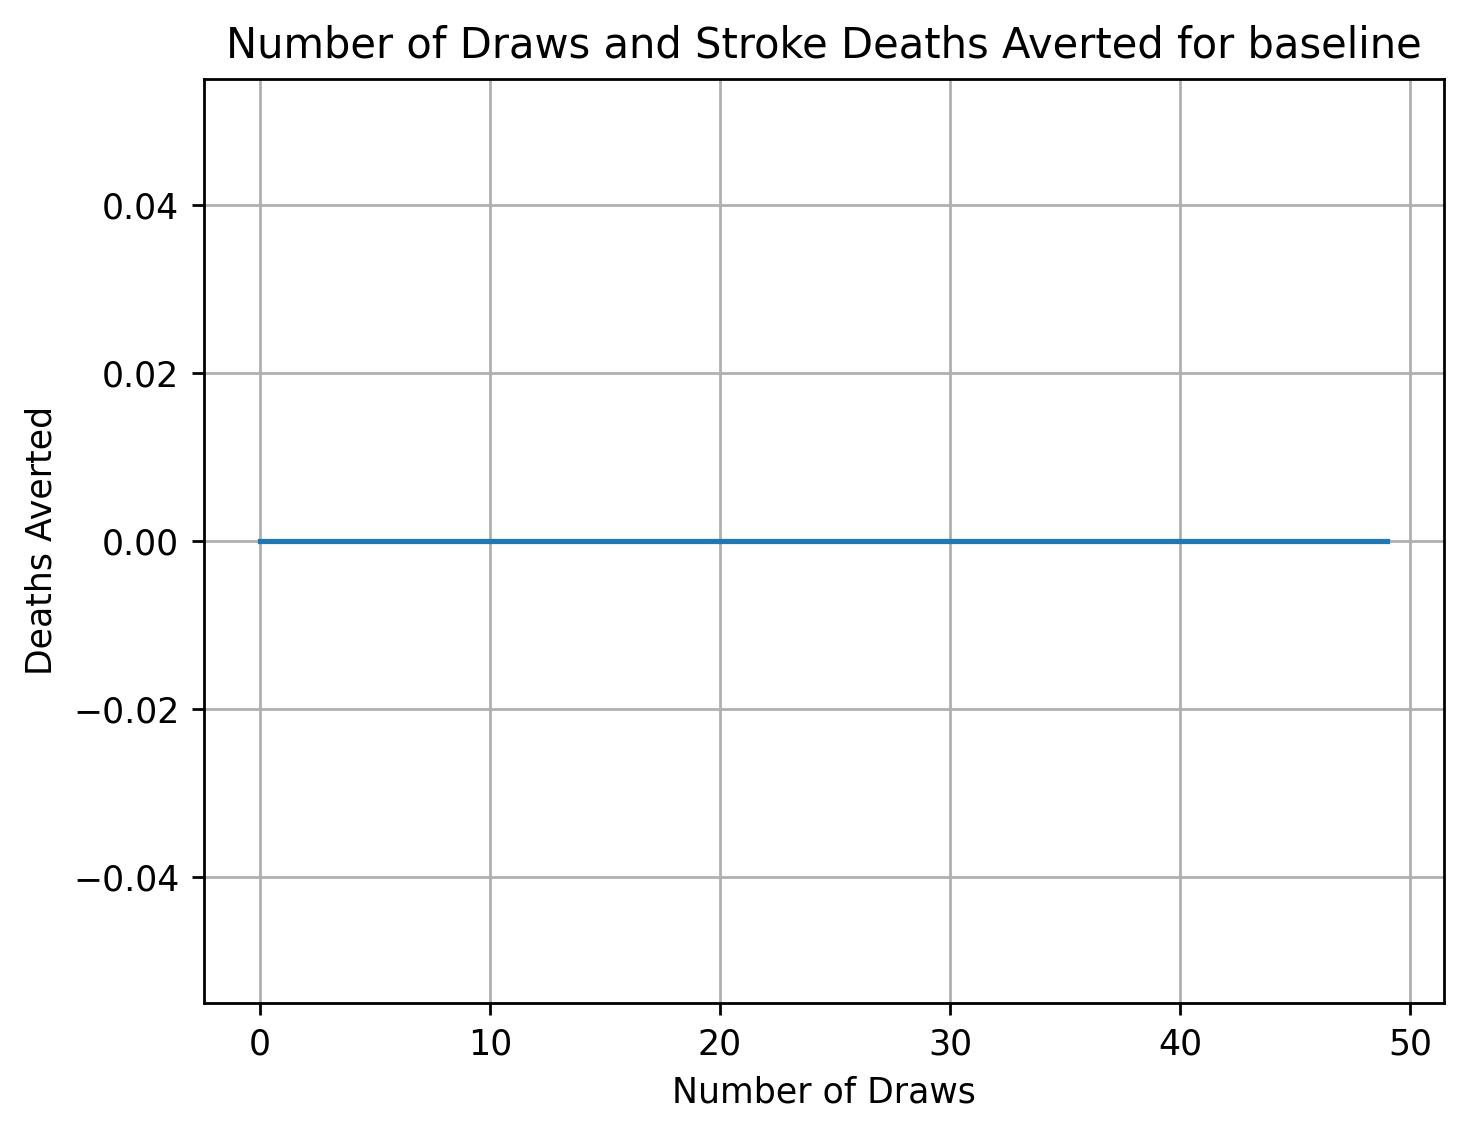

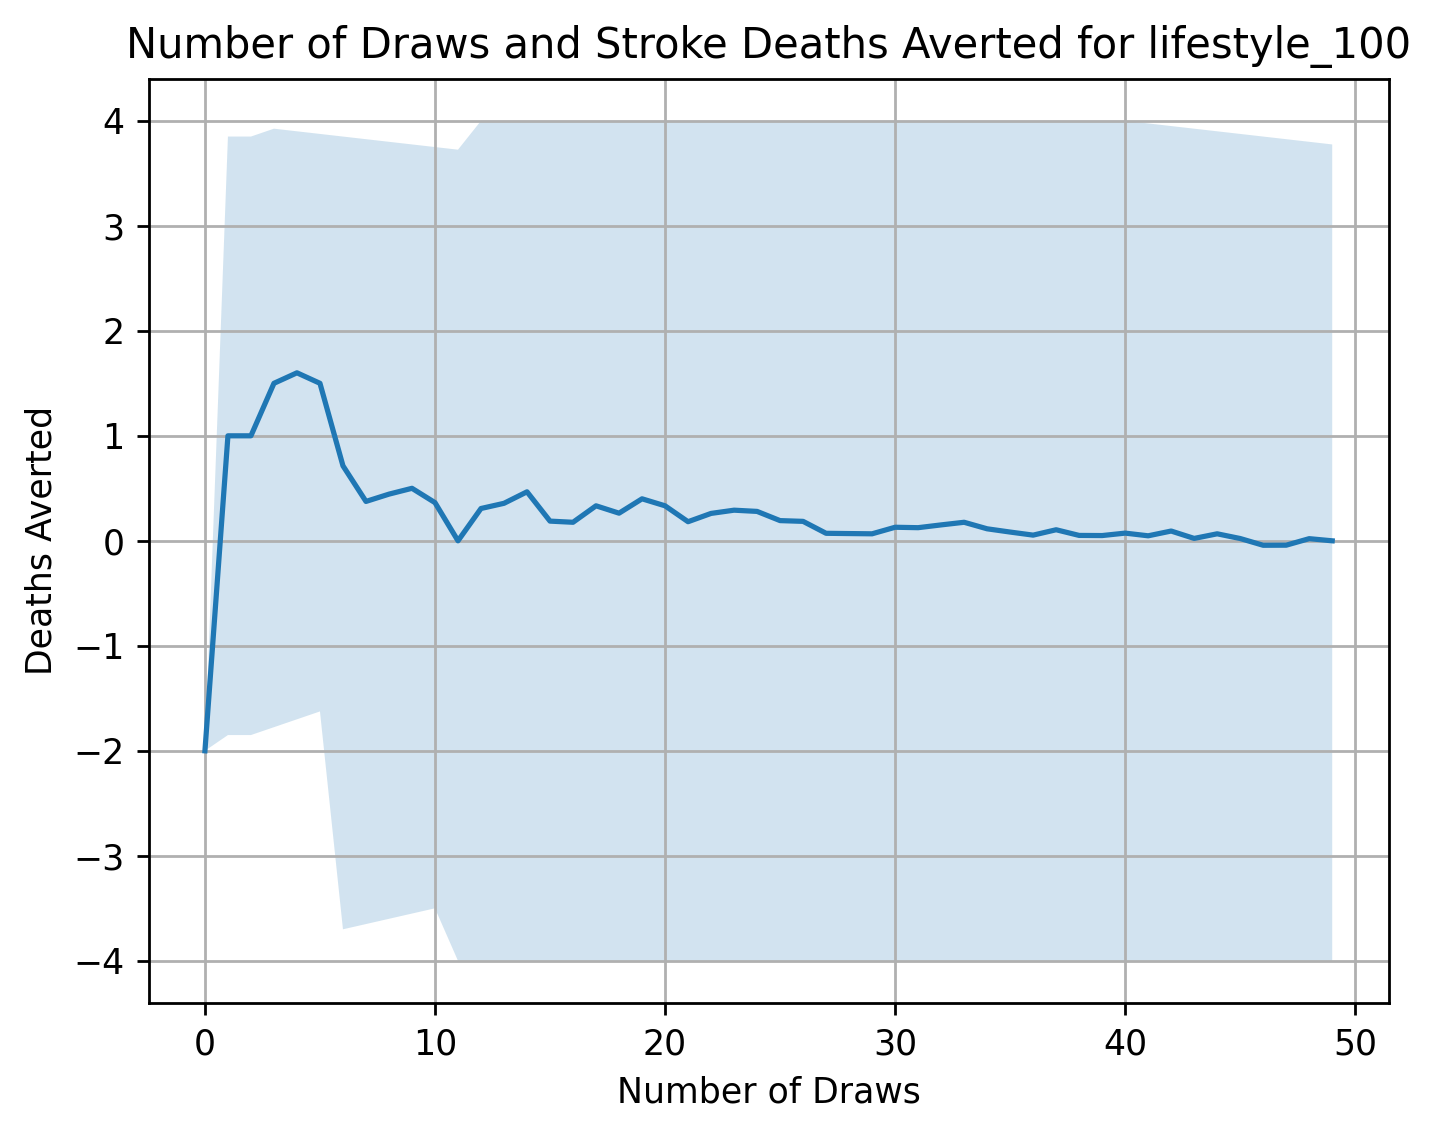

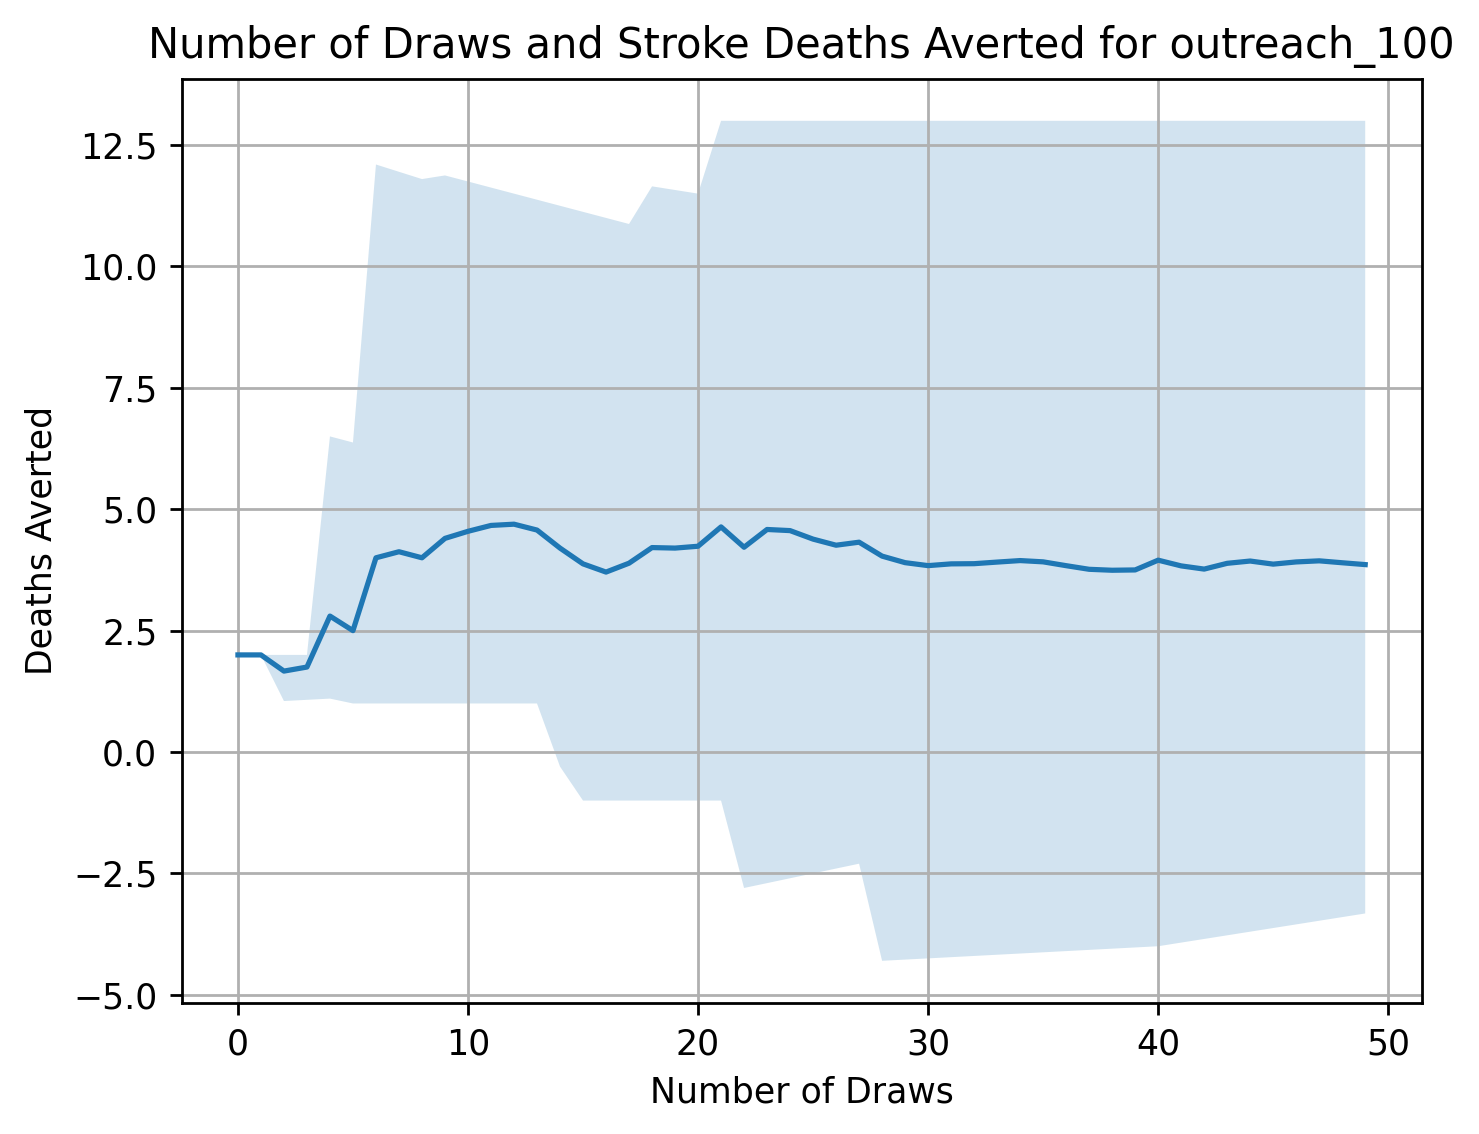

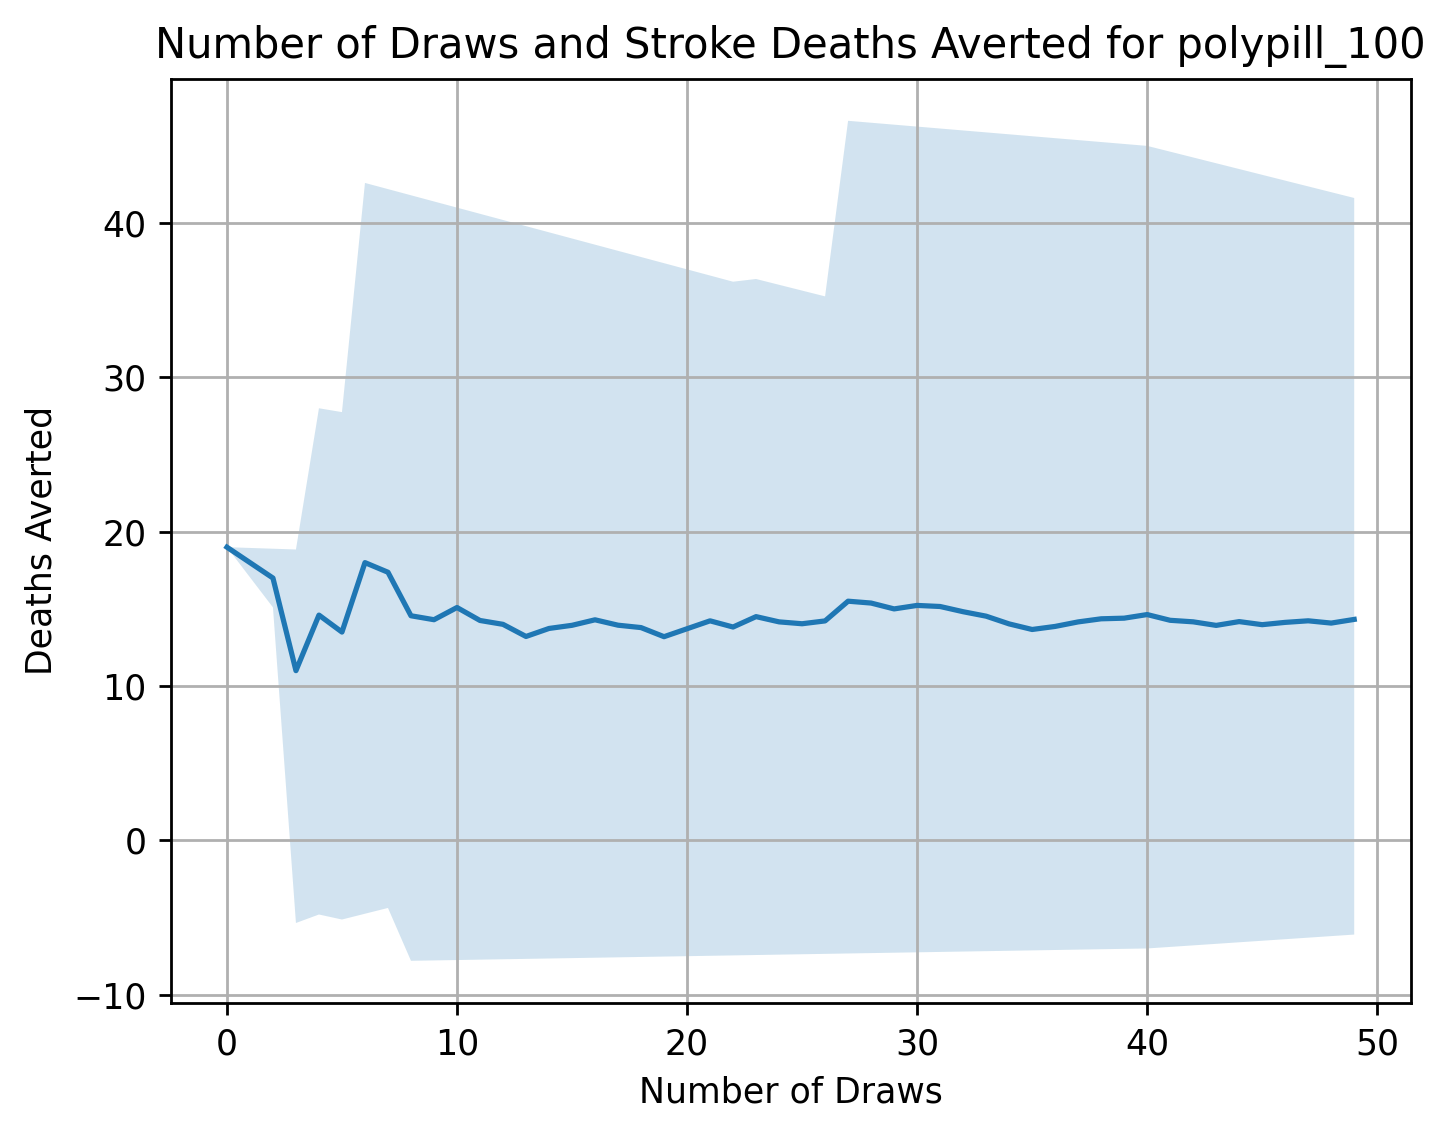

In [8]:
baseline_scenario = 'baseline'
draw_comparison = calc_averted_counts_draws(baseline_scenario)

for scenario in scenarios:
    plt.figure(dpi=250)
    p = draw_comparison.loc[(draw_comparison.scenario==scenario)]

    plt.plot(p['n_draws'], p['mean'])
    plt.fill_between(p['n_draws'], p['2.5%'], p['97.5%'], alpha=0.2)

    plt.grid()
    plt.ylabel('Deaths Averted')
    plt.xlabel('Number of Draws')
    plt.title(f'Number of Draws and Stroke Deaths Averted for {scenario}')

In [18]:
def calc_averted_counts_seeds(baseline_scenario):
    seed_comparison = pd.DataFrame()
    for i in list(range(0,len(deaths.random_seed.unique()))):
        random_seeds = deaths.random_seed.unique()[0:i+1]
        count = deaths.loc[deaths.random_seed.isin(random_seeds)]
        data = count #* 100_000).reset_index()
        data_baseline = data.loc[data.scenario==baseline_scenario]
        data_averted = (data_baseline.set_index([c for c in data.columns if c != 'value' and c != 'scenario']).drop(columns='scenario')
                        - data.set_index([c for c in data.columns if c != 'value' and c != 'scenario'] + ['scenario'])).reset_index()
        data_averted['baseline_scenario'] = baseline_scenario
        data_averted['n_seeds'] = i
        data_averted = data_averted.groupby(['scenario','baseline_scenario','n_seeds']).value.describe(percentiles=[0.025,0.975]).reset_index()
        seed_comparison = pd.concat([seed_comparison, data_averted], ignore_index=True)
    return seed_comparison

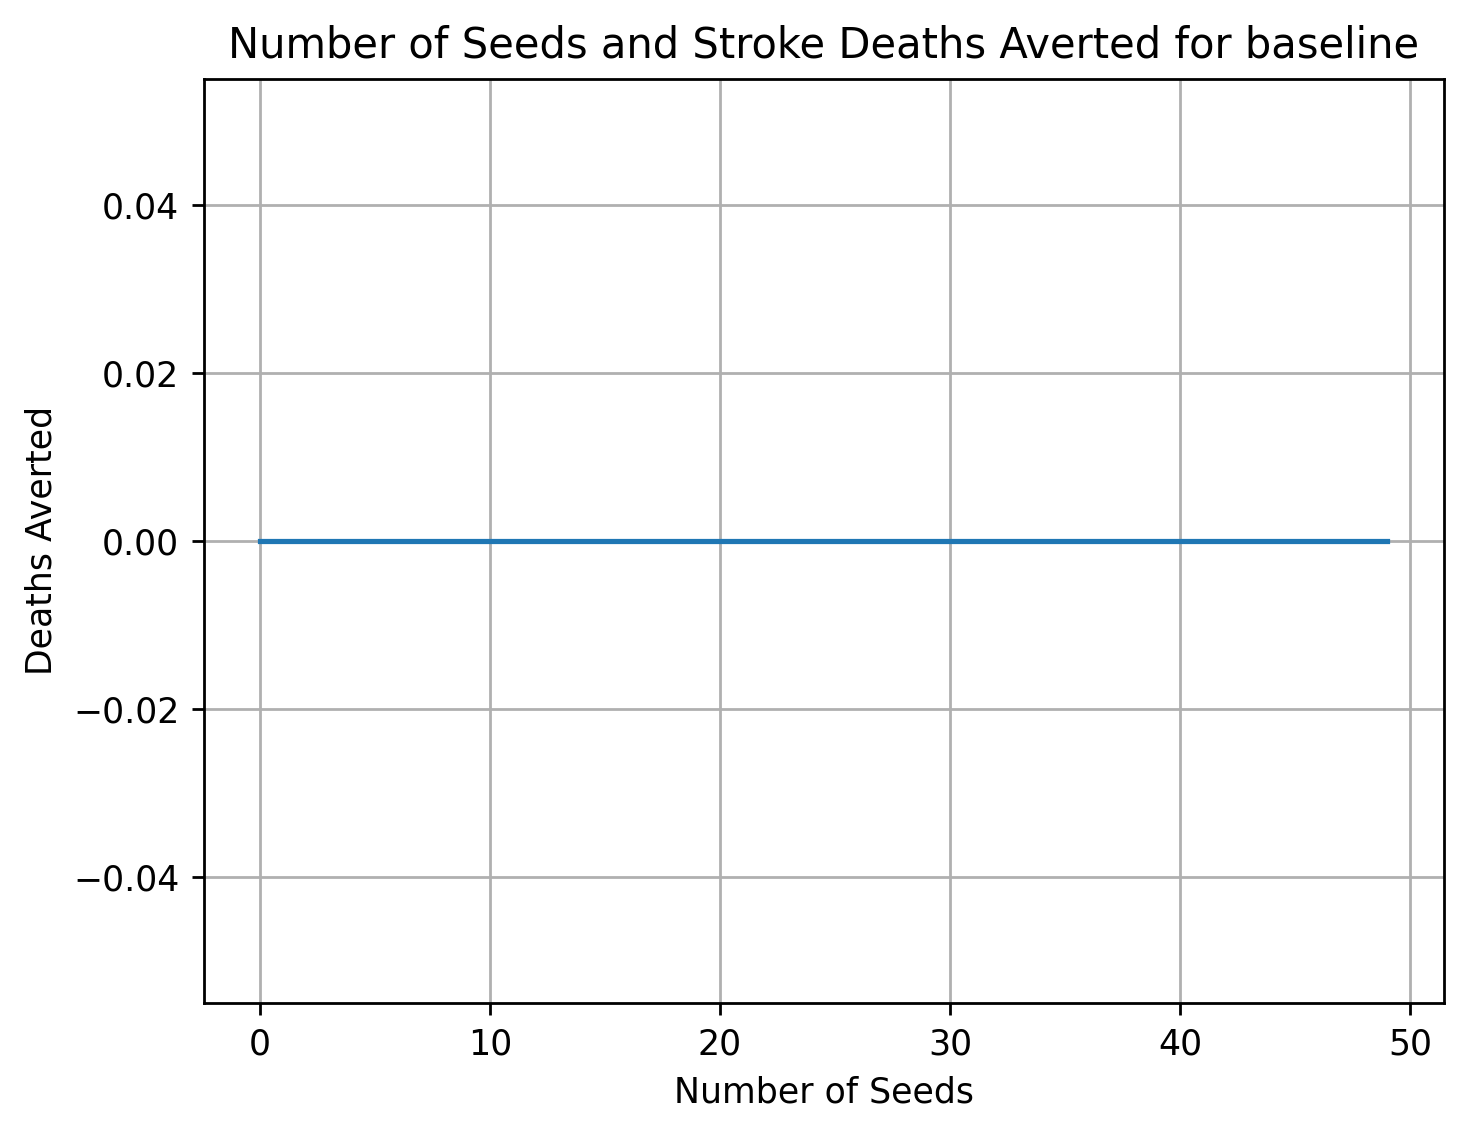

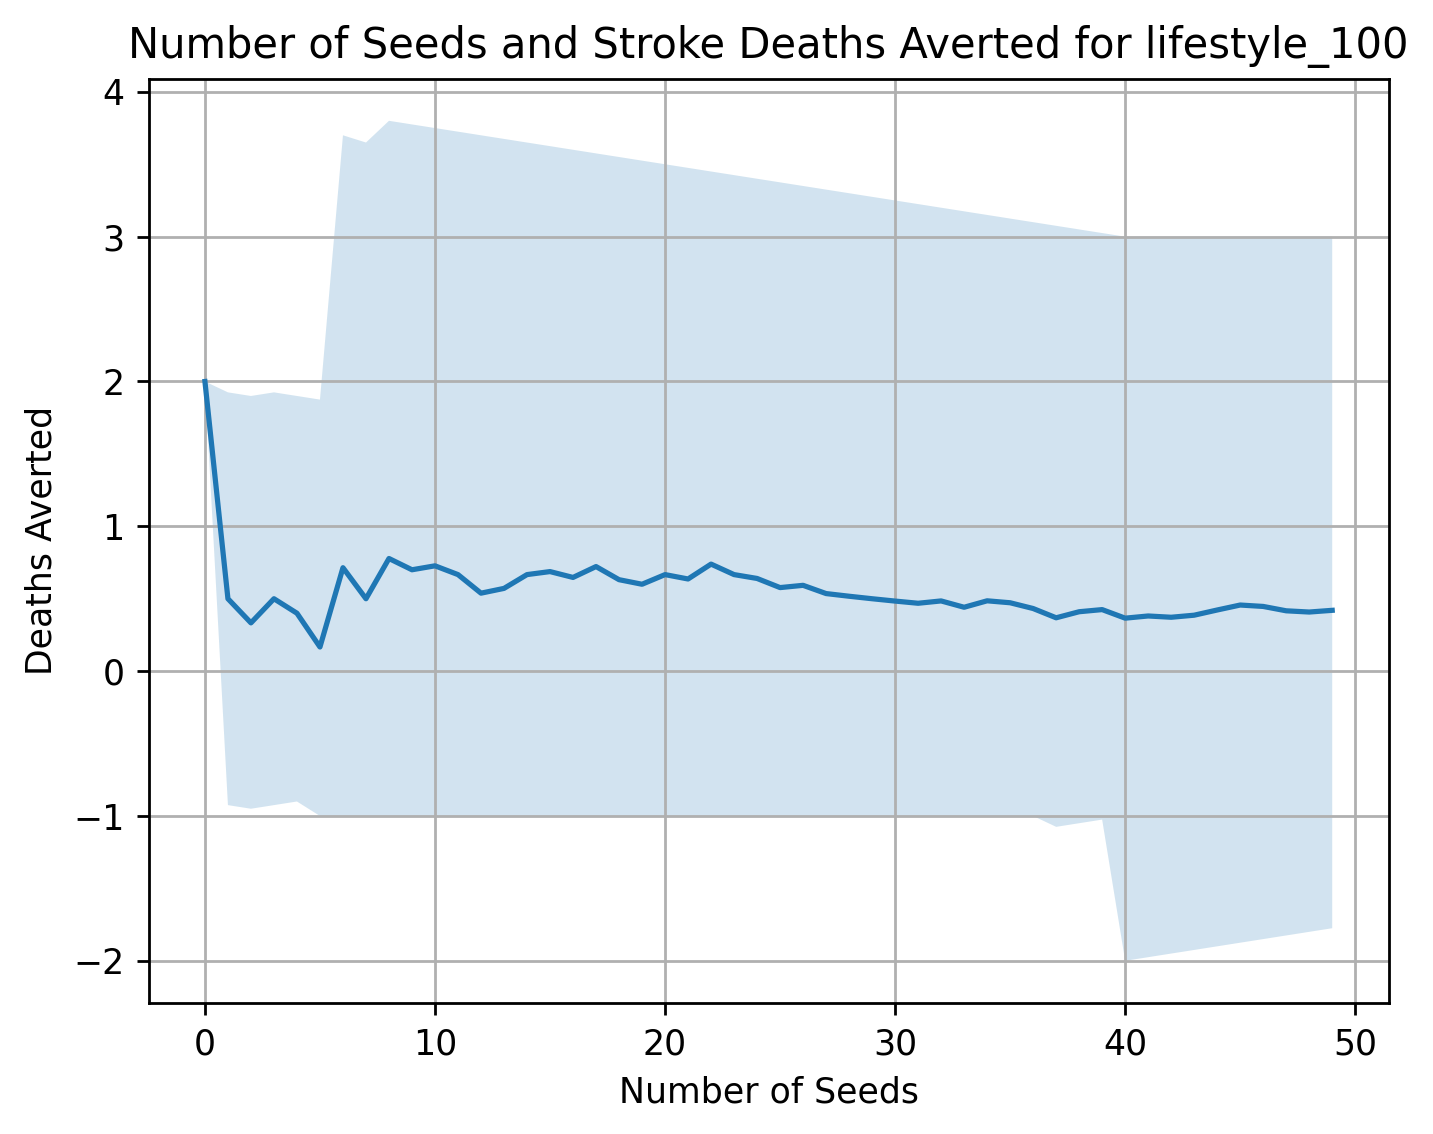

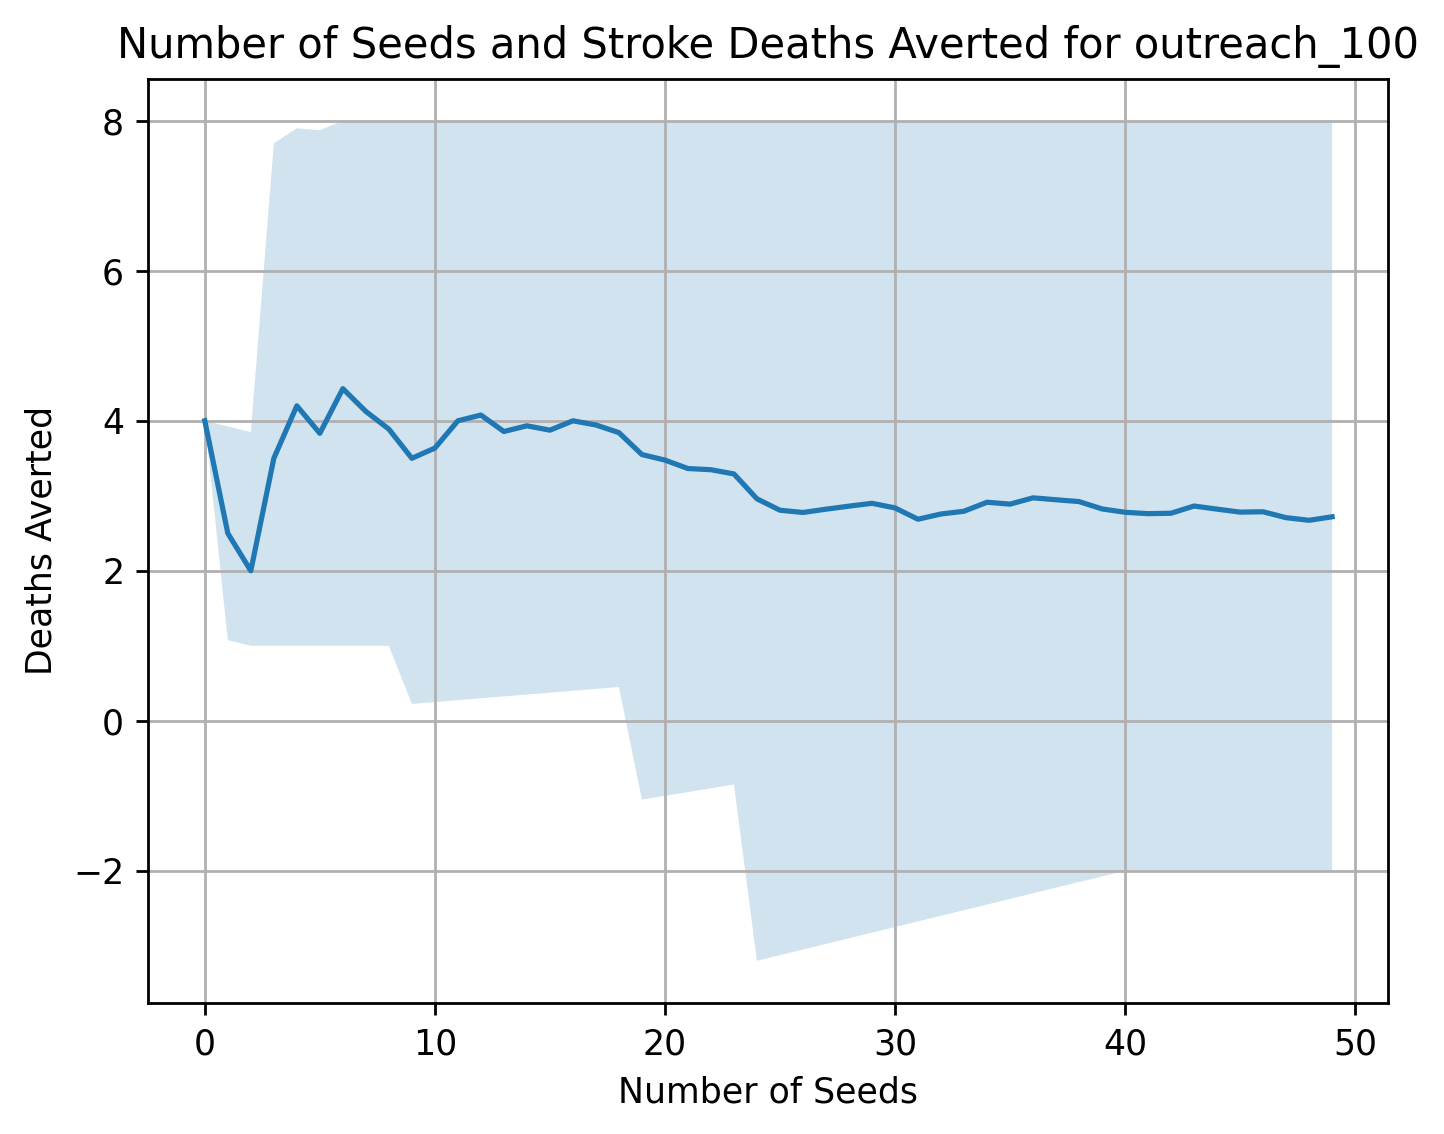

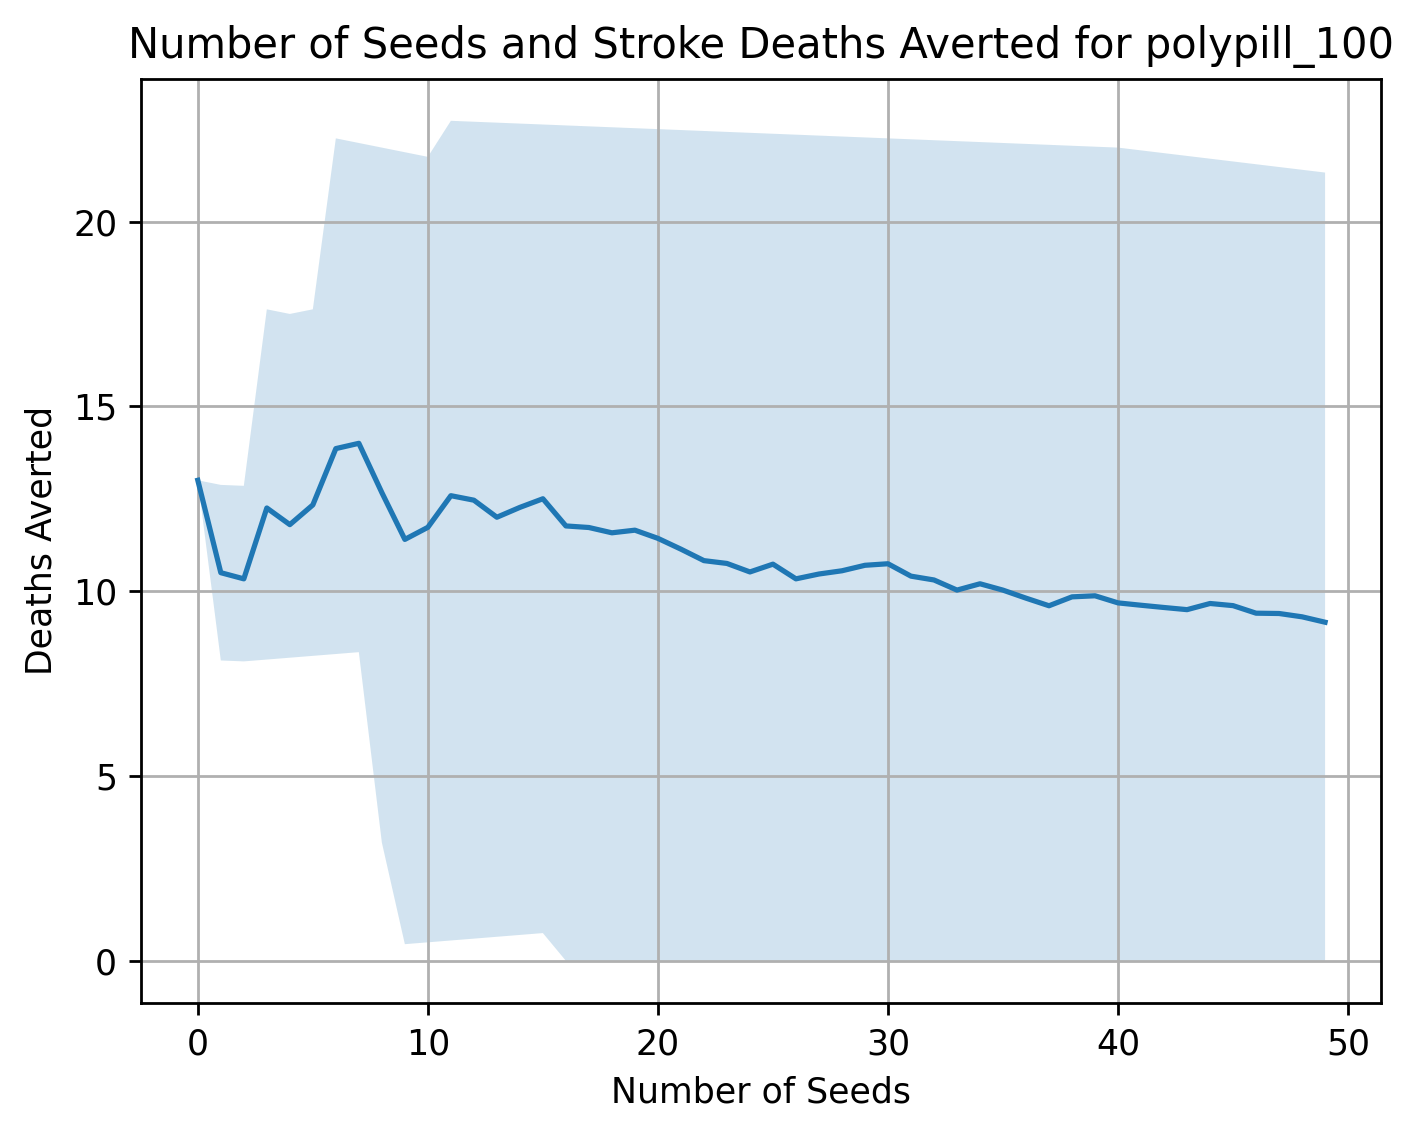

In [19]:
baseline_scenario = 'baseline'
seed_comparison = calc_averted_counts_seeds(baseline_scenario)

for scenario in scenarios:
    plt.figure(dpi=250)
    p = seed_comparison.loc[(seed_comparison.scenario==scenario)]

    plt.plot(p['n_seeds'], p['mean'])
    plt.fill_between(p['n_seeds'], p['2.5%'], p['97.5%'], alpha=0.2)

    plt.grid()
    plt.ylabel('Deaths Averted')
    plt.xlabel('Number of Seeds')
    plt.title(f'Number of Seeds and Stroke Deaths Averted for {scenario}')